# Neural Network Model 

### 1. Data Simulation (if no real data available)

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Simulate some FBG sensor data
## X represents some feature (e.g., sensor response) and y represents a target (e.g., temperature or strain)
#np.random.seed(42)
#X = np.random.rand(1000, 3)  # Let's assume 3 features from 3 FBG sensors
#y = 2 * X[:, 0] + 3 * X[:, 1] + 5 * X[:, 2] + np.random.normal(0, 0.1, 1000)  # Simulated target (e.g., temperature)

## Convert to DataFrame for better understanding
#df = pd.DataFrame(X, columns=['FBG1', 'FBG2', 'FBG3'])
#df['Target'] = y

## Display first few rows
#print(df.head())

## Write the generated data to a CSV file
#df.to_csv('fbg_sensor_data.csv', index=False)

#print("Data successfully written to 'fbg_sensor_data.csv'")

In [4]:
# Step 1: Load the CSV data
df = pd.read_csv('fbg_sensor_data.csv')
df.head()

,FBG1,FBG2,FBG3,Target
0,0.374540,0.950714,0.731994,7.367187
1,0.598658,0.156019,0.155995,2.507046
2,0.058084,0.866176,0.601115,5.788628
3,0.708073,0.020584,0.969910,6.190852
4,0.832443,0.212339,0.181825,3.332222


### 2. Data Preprocessing

In [5]:
# Split the data into features (X) and target (y)
X = df.drop('Target', axis=1).values  # Features are sensor readings (e.g., FBG wavelengths)
y = df['Target'].values  # Target is the physical parameter we want to predict (e.g., temperature or strain)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 3. Neural Network Model for Prediction

In [6]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression (predicting a single value)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Calculate and display the Mean Absolute Error
print(f'Mean Absolute Error on Test Set: {mae}')


Epoch 1/100


C:\Users\User-4603-1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 28.2595 - mae: 4.9380 - val_loss: 18.4109 - val_mae: 3.9354
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.8443 - mae: 3.8028 - val_loss: 9.5734 - val_mae: 2.6560
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4958 - mae: 2.5086 - val_loss: 3.2669 - val_mae: 1.5384
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6886 - mae: 1.3946 - val_loss: 1.5584 - val_mae: 1.0216
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2267 - mae: 0.8752 - val_loss: 1.1686 - val_mae: 0.8786
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9514 - mae: 0.7560 - val_loss: 1.0920 - val_mae: 0.8429
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8911 - mae: 0.7235 - val_loss: 1.0118 - val_mae: 0.8120
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7989 - mae: 0.6852 - val_loss: 0.9514 - val_mae: 0.7888
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7494 - mae: 

### 4. Plotting and Visualization

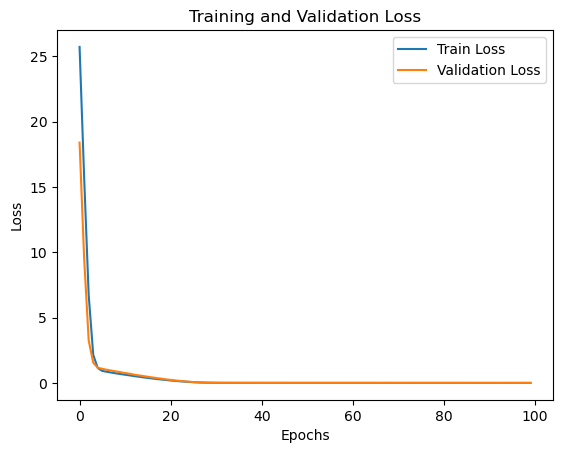

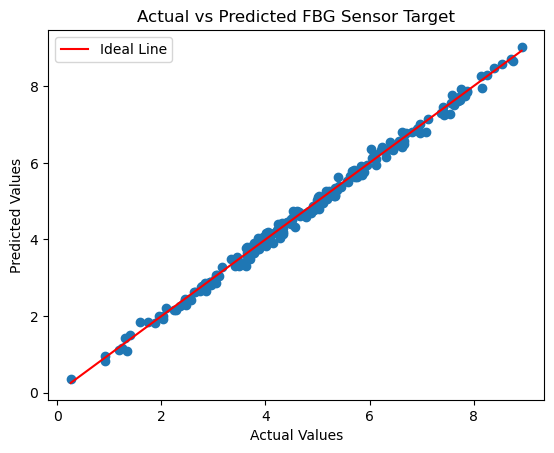

In [7]:
# Plot training history (loss)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the predicted vs actual values for the test set
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted FBG Sensor Target')
plt.legend()
plt.show()


### 5.Saving the Model for Future Use

In [8]:
# Save the model for future use
model.save('fbg_sensor_model.h5')


# Other approches of FBG sensor data collection 

In [9]:
# Summary of Approaches:
# Example 1: Simulated multiple targets (strain and temperature) with linear relationships.
# Example 2: Time-series data for FBG sensor readings, useful for dynamic environments.
# Example 3: A nonlinear target simulation, illustrating nonlinear behavior.
# Example 4: Simulated data with different environmental conditions (strain, temperature, pressure).

# Example 1: Simulate Data with Multiple Targets (Strain and Temperature)

In [10]:
#In this example, we simulate FBG sensor readings for both strain and temperature and save them in a CSV file.

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Simulate FBG sensor data for 1000 samples with 3 sensors
np.random.seed(42)
X = np.random.rand(1000, 3)  # Let's assume 3 features from 3 FBG sensors

# Simulate two target variables: strain and temperature
strain = 2 * X[:, 0] + 3 * X[:, 1] + 5 * X[:, 2] + np.random.normal(0, 0.1, 1000)
temperature = 1.5 * X[:, 0] + 2.5 * X[:, 1] + 4 * X[:, 2] + np.random.normal(0, 0.1, 1000)

# Convert to DataFrame for better understanding
df = pd.DataFrame(X, columns=['FBG1', 'FBG2', 'FBG3'])  # Features from 3 FBG sensors
df['Strain'] = strain  # Simulated strain
df['Temperature'] = temperature  # Simulated temperature

# Display the first few rows of the data
print(df.head())

# Write the generated data to a CSV file
df.to_csv('fbg_sensor_strain_temperature_data.csv', index=False)

print("Data successfully written to 'fbg_sensor_strain_temperature_data.csv'")


       FBG1      FBG2      FBG3    Strain  Temperature
0  0.374540  0.950714  0.731994  7.367187     5.814632
1  0.598658  0.156019  0.155995  2.507046     1.877922
2  0.058084  0.866176  0.601115  5.788628     4.699857
3  0.708073  0.020584  0.969910  6.190852     5.000925
4  0.832443  0.212339  0.181825  3.332222     2.447430
Data successfully written to 'fbg_sensor_strain_temperature_data.csv'
